In [2]:
import pandas as pd

data = pd.DataFrame({"A": ["1", "2", "3"], "B": ["4", "5", "6"], "C": ["7", "8", "9"]})

data[["A", "B", "C"]] = data[["A", "B", "C"]].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       3 non-null      int64
 1   B       3 non-null      int64
 2   C       3 non-null      int64
dtypes: int64(3)
memory usage: 204.0 bytes


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../resources/10장/medical.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


In [4]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   SMS_received    110527 non-null  int64  
 8   No-show         110527 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.6+ MB


In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df = df[df["Age"] >= 0]
df["Age"].min()

np.int64(0)

In [8]:
df["No-show"] = df["No-show"].map({"Yes": 1, "No": 0})
df["No-show"].value_counts()

No-show
0    88207
1    22319
Name: count, dtype: int64

In [9]:
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(4), object(2)
memory usage: 8.4+ MB


In [10]:
df["waiting_day"] = df["AppointmentDay"].dt.dayofyear - df["ScheduledDay"].dt.dayofyear
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
 9   waiting_day     110526 non-null  int32              
dtypes: datetime64[ns, UTC](2), float64(1), int32(1), int64(4), object(2)
memory usage: 8.9+ MB


In [11]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received,No-show,waiting_day
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474932e+14,5.675304e+06,37.089219,0.321029,0.201934,9.979046
std,2.560937e+14,7.129544e+04,23.110026,0.466874,0.401445,15.607516
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,-223.000000
25%,4.170000e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680572e+06,37.000000,0.000000,0.000000,4.000000
75%,9.440000e+13,5.725523e+06,55.000000,1.000000,0.000000,15.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,146.000000


In [12]:
df = df[df["waiting_day"] >= 0]
df["waiting_day"].min()

np.int32(0)

In [13]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

<Axes: xlabel='Age'>

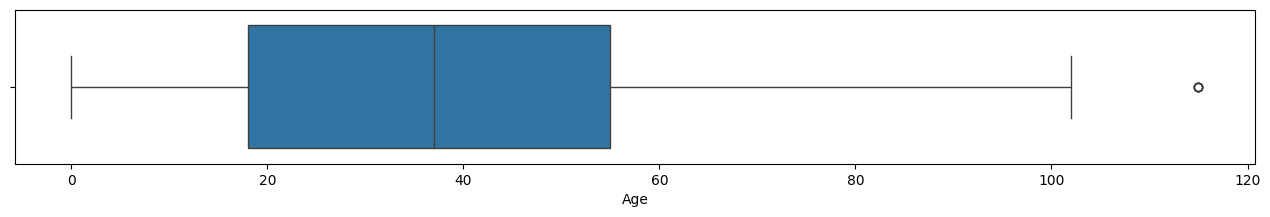

In [14]:
plt.figure(figsize=(16, 2))
sns.boxplot(x=df.Age)

<Axes: xlabel='Age'>

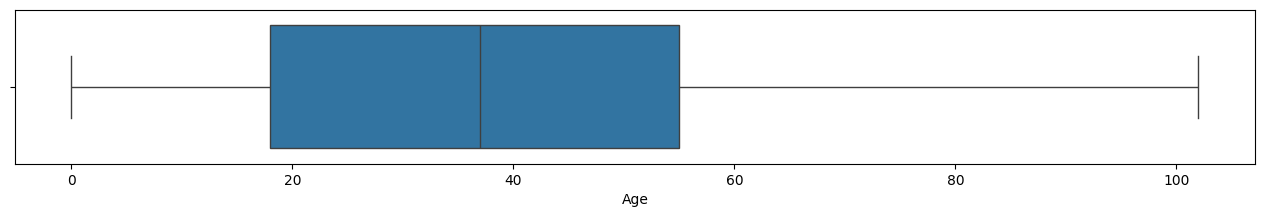

In [15]:
df = df[df["Age"] <= 110]
plt.figure(figsize=(16, 2))
sns.boxplot(x=df.Age)

In [16]:
a = df[df["waiting_day"] == 0]["waiting_day"].value_counts()
b = df[(df["waiting_day"] == 0) & (df["No-show"] == 1)]["waiting_day"].value_counts()
b / a

waiting_day
0    0.046472
Name: count, dtype: float64

In [17]:
no_show = df[df["No-show"] == 1]
show = df[df["No-show"] == 0]

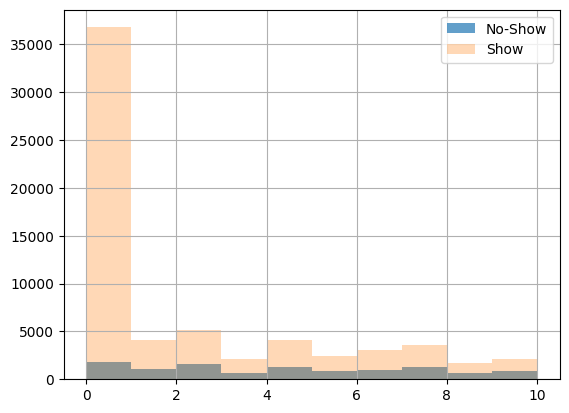

In [18]:
no_show[no_show["waiting_day"] <= 10]["waiting_day"].hist(alpha=0.7, label="No-Show")
show[show["waiting_day"] <= 10]["waiting_day"].hist(alpha=0.3, label="Show")
plt.legend()

<Axes: >

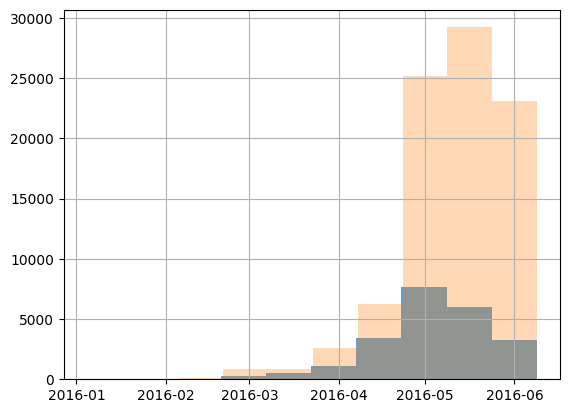

In [19]:
no_show["ScheduledDay"].hist(alpha=0.7, label="No-Show")
show["ScheduledDay"].hist(alpha=0.3, label="Show")

<Axes: >

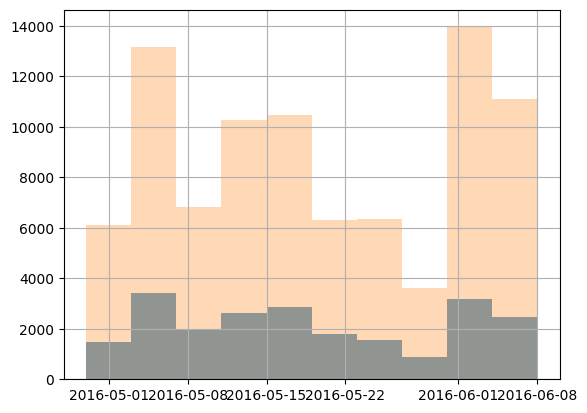

In [20]:
no_show["AppointmentDay"].hist(alpha=0.7, label="No-Show")
show["AppointmentDay"].hist(alpha=0.3, label="Show")

<Axes: >

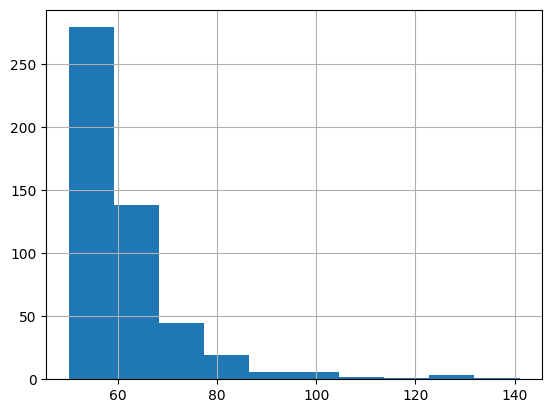

In [24]:
df["PatientId"].value_counts().iloc[0:500].hist()

<Axes: xlabel='SMS_received', ylabel='waiting_day'>

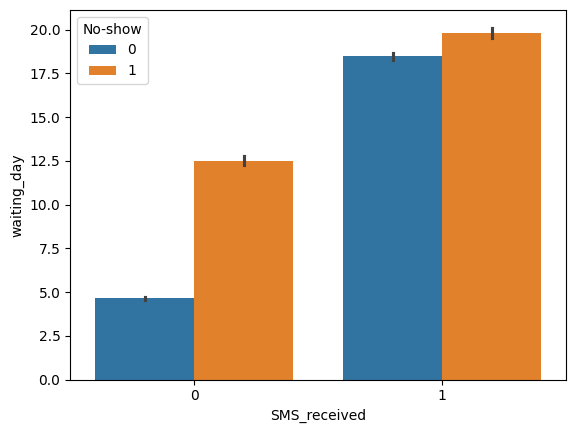

In [25]:
# 알림 메시지 허용 여부와 기다리는 기간에 따른 노쇼 발생 횟수 확인
sns.barplot(x="SMS_received", y="waiting_day", hue="No-show", data=df)

In [31]:
a = len(df[(df["SMS_received"] == 0) & (df["No-show"] == 1)])
b = len(df[(df["SMS_received"] == 0) & (df["No-show"] == 0)])
print(f"SMS_received가 0일 때 노쇼: {a}")
print(f"SMS_received가 0일 때 쇼: {b}")
print(f"SMS_received가 0일 때 노쇼 비율: {a/(a+b)}\n")

c = len(df[(df["SMS_received"] == 1) & (df["No-show"] == 1)])
d = len(df[(df["SMS_received"] == 1) & (df["No-show"] == 0)])
print(f"SMS_received가 1일 때 노쇼: {a}")
print(f"SMS_received가 1일 때 쇼: {b}")
print(f"SMS_received가 1일 때 노쇼 비율: {a/(a+b)}")

SMS_received가 0일 때 노쇼: 12522
SMS_received가 0일 때 쇼: 62494
SMS_received가 0일 때 노쇼 비율: 0.1669243894635811

SMS_received가 1일 때 노쇼: 12522
SMS_received가 1일 때 쇼: 62494
SMS_received가 1일 때 노쇼 비율: 0.1669243894635811


<Axes: >

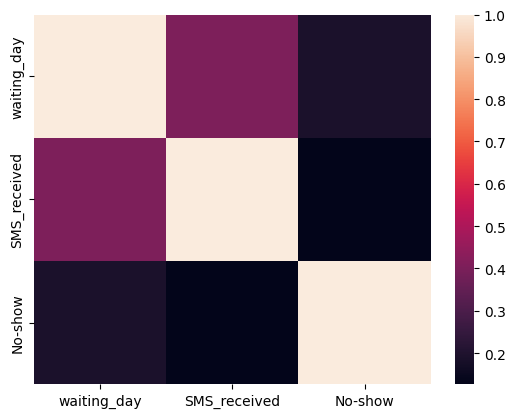

In [37]:
temp = df[["waiting_day", "SMS_received", "No-show"]].corr()
sns.heatmap(data=temp)

<Axes: xlabel='No-show', ylabel='count'>

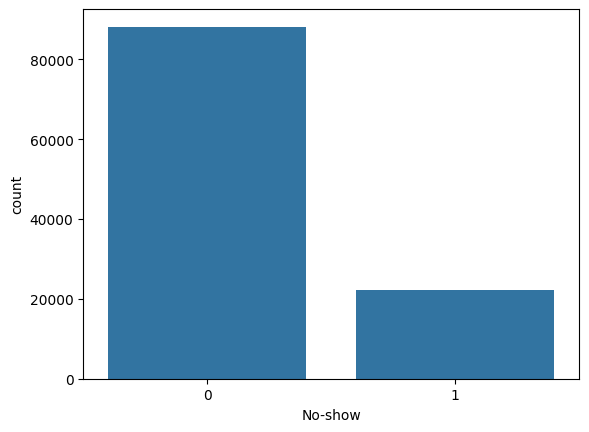

In [38]:
sns.countplot(x="No-show", data=df)

<Axes: xlabel='Gender', ylabel='count'>

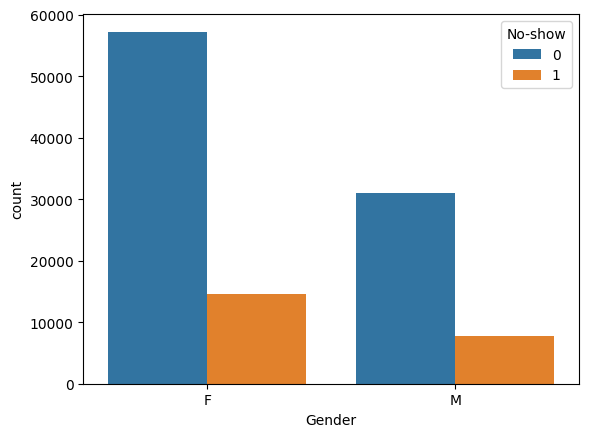

In [44]:
sns.countplot(x="Gender", hue="No-show", data=df)

In [47]:
female_noshow = df[(df["Gender"] == "F") & (df["No-show"] == 1)][
    "Gender"
].value_counts()
male_noshow = df[(df["Gender"] == "M") & (df["No-show"] == 1)]["Gender"].value_counts()
print(female_noshow)
print(male_noshow)
female = df[df["Gender"] == "F"]["Gender"].value_counts()
male = df[df["Gender"] == "M"]["Gender"].value_counts()
print(female_noshow / female)
print(male_noshow / male)

Gender
F    14577
Name: count, dtype: int64
Gender
M    7715
Name: count, dtype: int64
Gender
F    0.203062
Name: count, dtype: float64
Gender
M    0.199519
Name: count, dtype: float64
